#### ML03: Feature Engineering

**Introduction**

So far we've looked at taking some data and applying some ML algorithms to it and then validating and visualising our work. However an important and under-represented part of the ML process is that of **feature engineering**.

As we've learned from the previous chapters **features** (also sometimes called **predictors**) are data attributes upon which we can base predictions. They can take many forms and can be selected, dropped, tuned and transformed  in order to make the model in which they're used as accurate and robust as possible. This process is called **feature engineering** and in contrast to the modelling aspect of ML, there is a fair amount of judgement and trial and error involved in the process.

In this chapter we'll be exploring some different types of **feature engineering**, and how and when it's appropriate to apply these. Some of these you may have come across before and are ubiquitous across the data and analytical landscape, wheras others are more specific to ML.



**Data**  
To start our feature engineering journey, we're going to be using another famous dataset in data science circles, the [Titanic Survival Dataset](https://www.kaggle.com/skosterin88/test-dataset-for-titanic-competition). This dataset isn't as clean as the previous datasets we've been using so it will serve as a welcome opportunity to introduce ourselves to **feature engineering**.  

The data has already been split into **train** and **test** datasets. The **test** dataset doesn't contain any information on survival so we'll just be using the **train** dataset.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We can then import the data as follows:

In [61]:
path = '../data/'

# Importing the datasets and concatanating them
df = pd.read_csv('{}titanic_train.csv'.format(path))

df.columns = [
    x.lower() for x in df.columns
]

print('Total Records: ',len(df))
df.head(5)

Total Records:  891


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The variable descriptions are as follows:

* age: Passenger’s age
* cabin: Passenger's cabin
* embarked: The port at which the passenger embarked (Southampton, Belfast or Cherbourg)
* fare: The fare the passenger paid
* name: The passenger's name
* parch: The number of parents / children aboard
* passengerid: Unique ID for each passenger
* pclass: The class that the passenger was travelling in
* sex: The sex of the passenger
* sibsp: The number of siblings aboard
* survived: Whether the passenger survived
* ticket: The passenger's ticket number


**Categorical Variables**

We can see that we have some categorical variables in the dataset, including `name`, `sex`, `ticket`, `cabin` and `embarked`. It's important to note that when we run our exploratory analysis these variables won't be included unless we can convert them to numeric variables. We can do this by getting the unique values, placing these into a dictionary and then using the `.replace()` method to convert them to a number. We'll do this for the 'sex' and 'embarked' variables as the others will have too high a cardinality to provide any meaningful insight.

In [62]:
print('Sex values: ',list(df['sex'].unique()))
print('Embarked values: ', list(df['embarked'].unique()))

Sex values:  ['male', 'female']
Embarked values:  ['S', 'C', 'Q', nan]


In [63]:
# Fill the nan values in embarked with '' to make dealing with them easier
df['embarked'].fillna('')

sex_codes = {
    'male' : 0,
    'female' : 1,
}

embarked_codes = {
    'S': 0,
    'Q': 1,
    'C': 2,
    '': None
}

# Replace the categorical values with the values from the codes dictionaries
df['sex'].replace(sex_codes, inplace=True)
df['embarked'].replace(embarked_codes, inplace=True)
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


**Data Exploration**

We'll start by exploring the dataset in a similar manner to prevoiusly.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null int64
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [65]:
df_corr = df.corr()
df_corr.round(1)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,1.0,-0.0,-0.0,-0.0,0.0,-0.1,-0.0,0.0,-0.0
survived,-0.0,1.0,-0.3,0.5,-0.1,-0.0,0.1,0.3,0.2
pclass,-0.0,-0.3,1.0,-0.1,-0.4,0.1,0.0,-0.5,-0.2
sex,-0.0,0.5,-0.1,1.0,-0.1,0.1,0.2,0.2,0.1
age,0.0,-0.1,-0.4,-0.1,1.0,-0.3,-0.2,0.1,0.0
sibsp,-0.1,-0.0,0.1,0.1,-0.3,1.0,0.4,0.2,-0.1
parch,-0.0,0.1,0.0,0.2,-0.2,0.4,1.0,0.2,-0.0
fare,0.0,0.3,-0.5,0.2,0.1,0.2,0.2,1.0,0.2
embarked,-0.0,0.2,-0.2,0.1,0.0,-0.1,-0.0,0.2,1.0


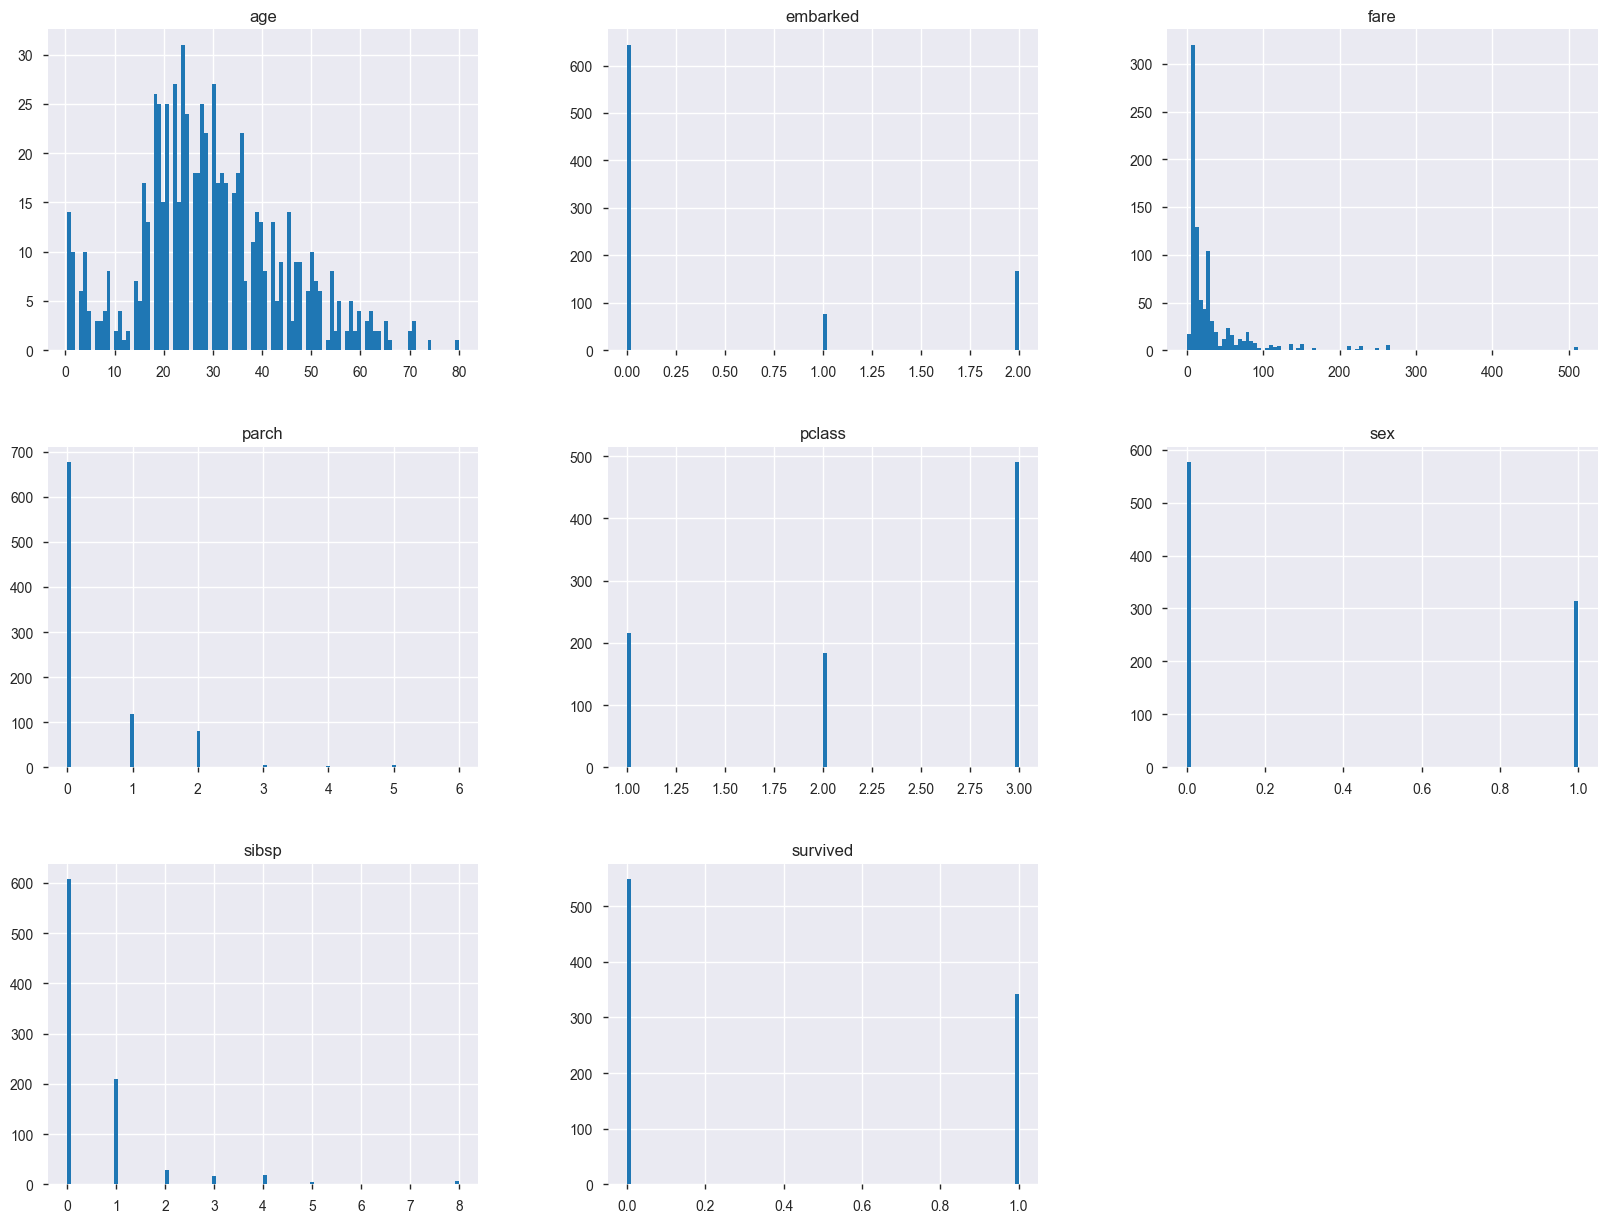

In [66]:
df.drop('passengerid', axis=1).hist(bins=100, figsize=(20,15))
plt.show()

In [67]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,9
Categorical,2
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


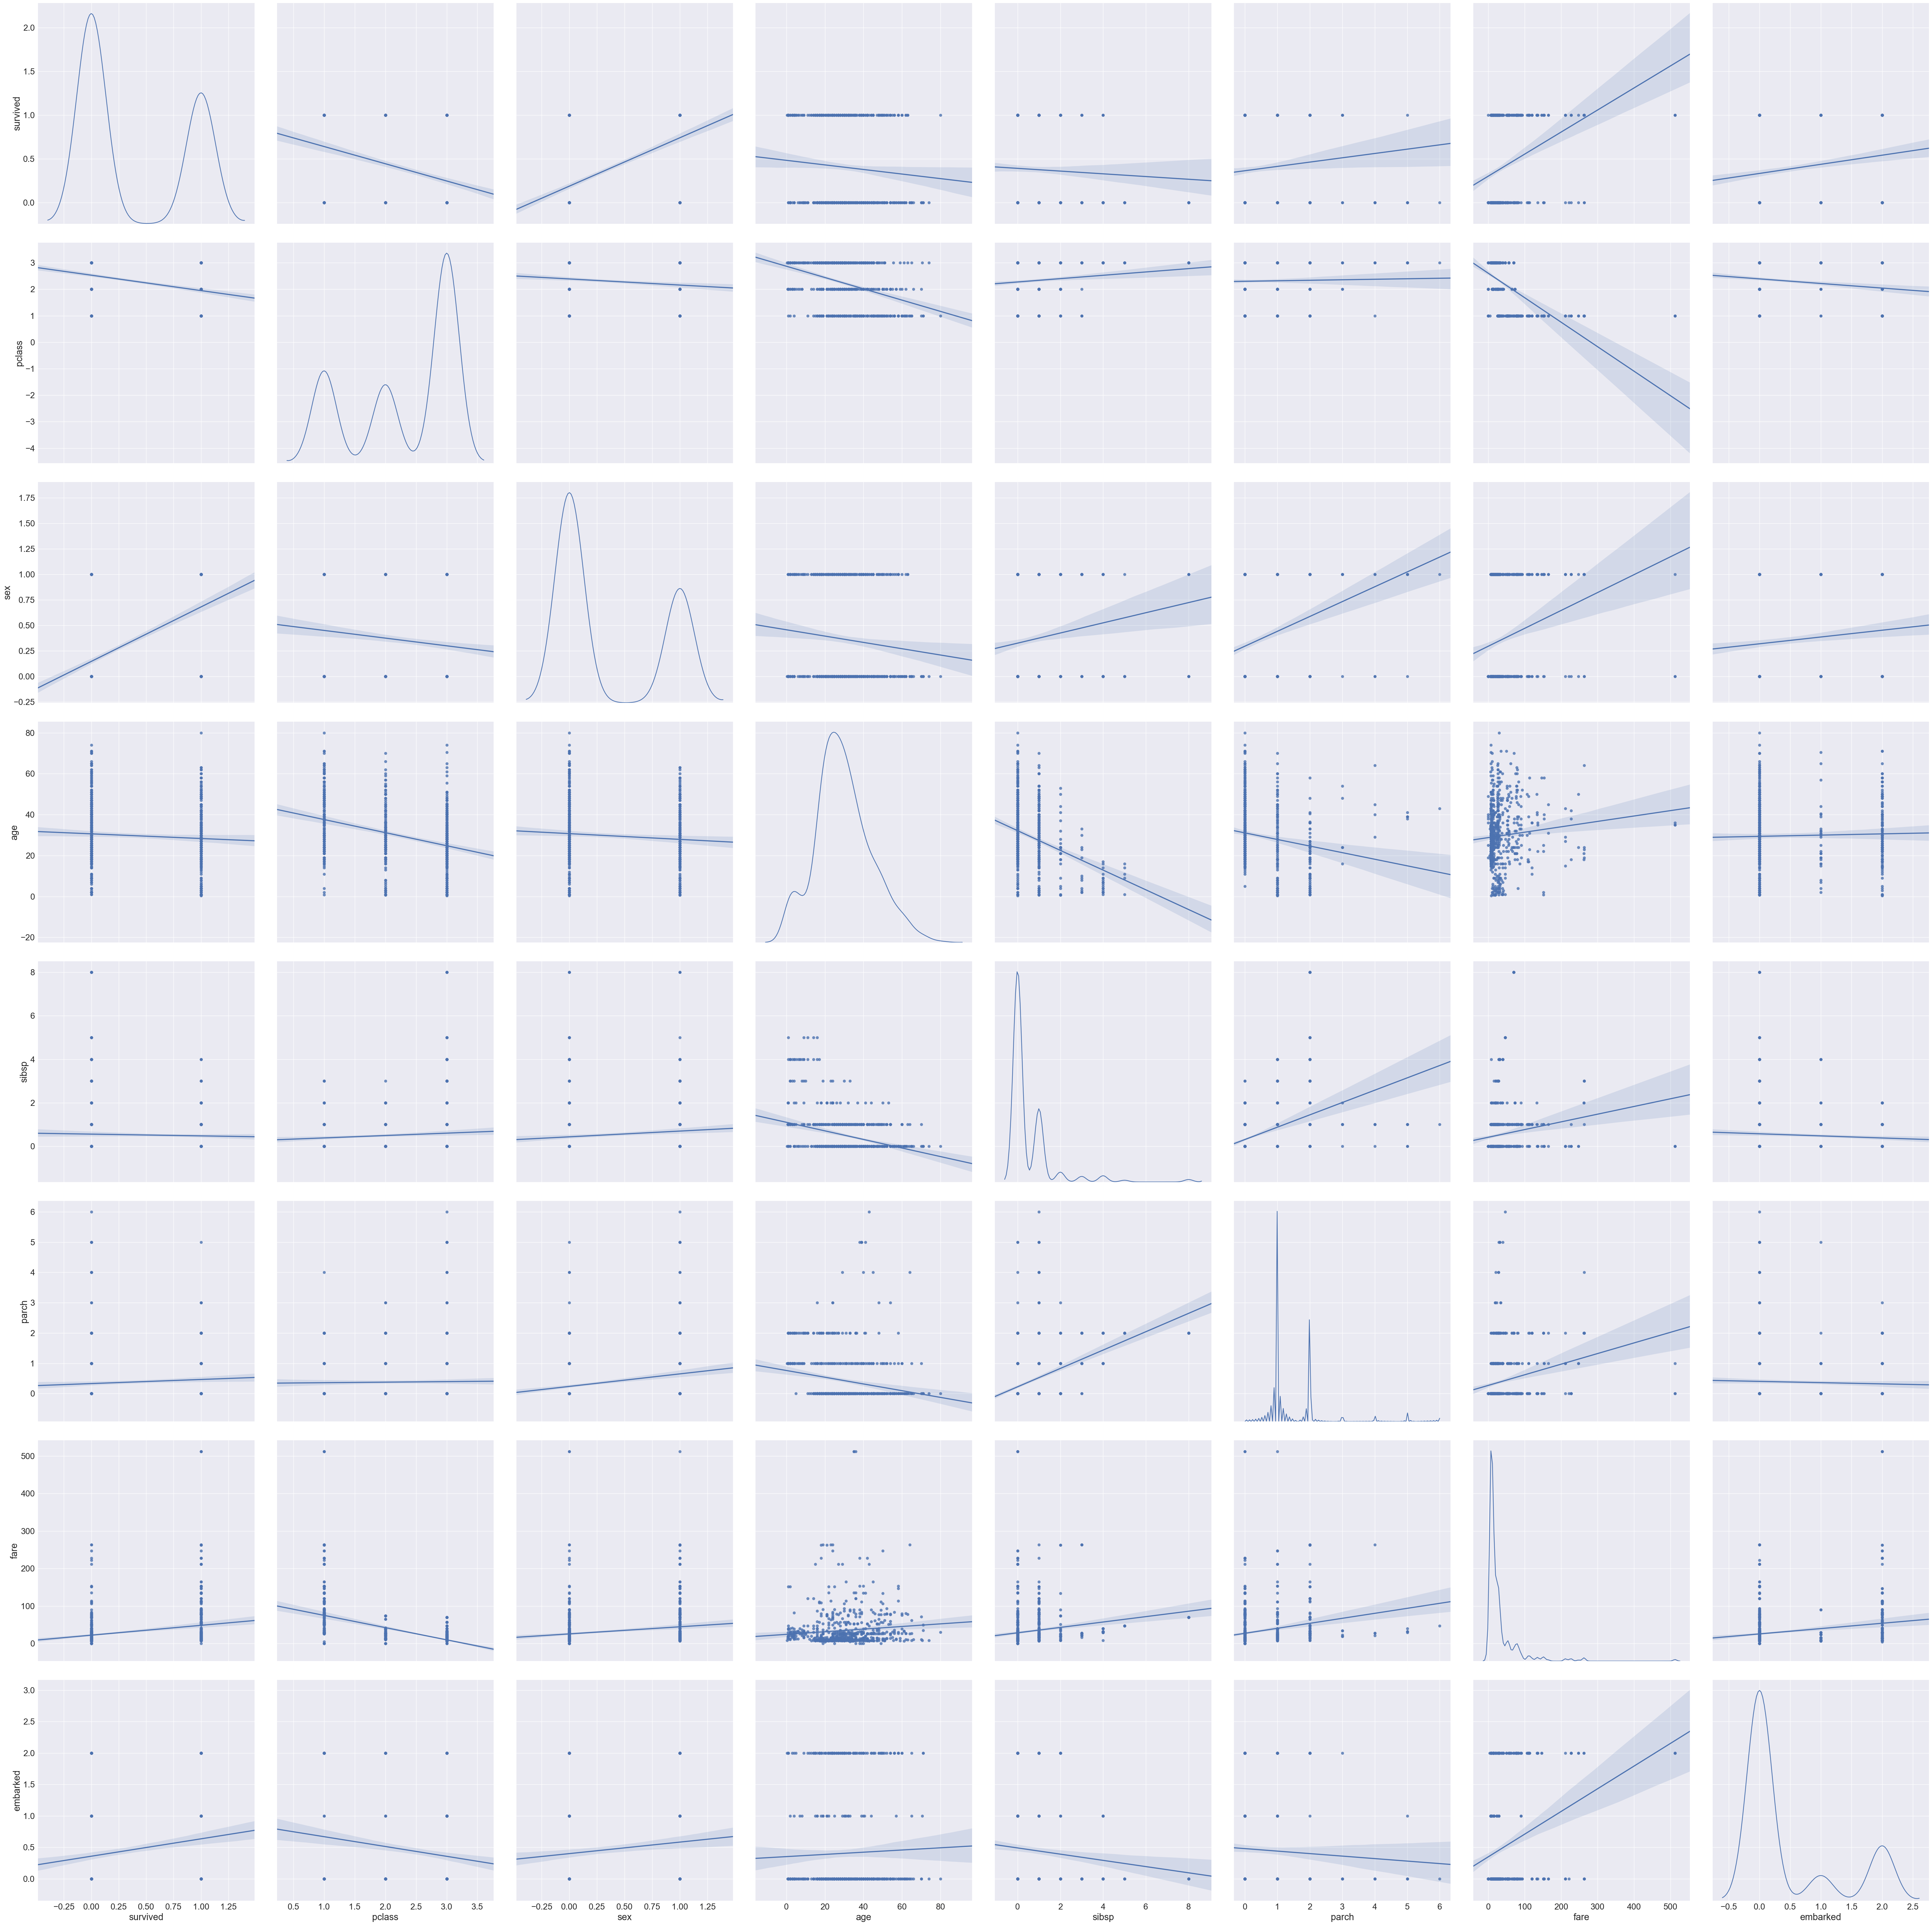

In [71]:
# Making the fonts bigger
sns.set(font_scale=2)

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df.drop('passengerid', axis=1), 
    diag_kind='kde',
    kind="reg",
    size=8
)

**Missing Data**

Before we start to draw conclusions from our exploratory analysis, one thing that's worth notin is that we can see from the profile report that there's a lot of missing data in the dataframe. Whilst under normal circumstances this is far from ideal from a **feature engineering** perspective it's fantastic as it allows us to explore some new techniques and concepts.

Additionally there's a nice Python package called `missingno` that allows us to visualise the missing values in the dataset. Let's install this now and use it to visualise the missing data.

In [73]:
import sys
!{sys.executable} -m pip install missingno

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


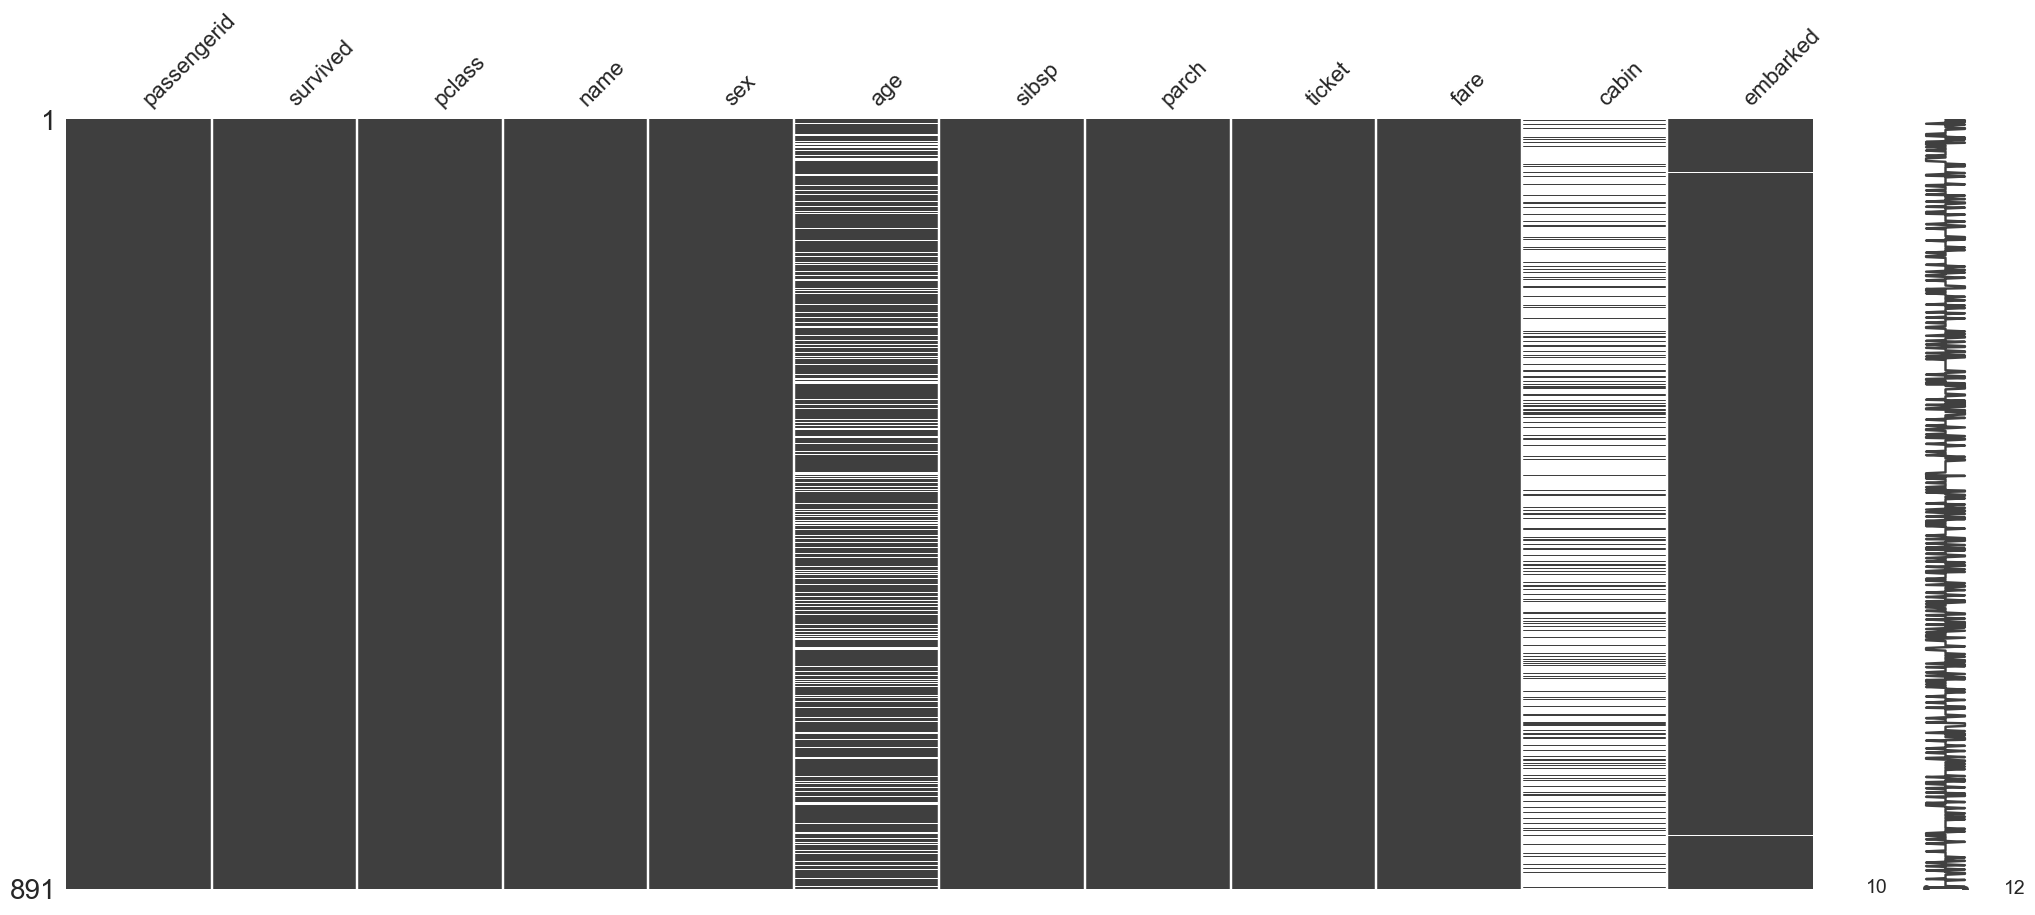

In [72]:
missingno.matrix(df)

We can see here that the missing data is largely confined to the `age` and `cabin` variables, although there are a couple in the `embarked` column also. We should treat these variables with caution until we can figure out a way to minimise the impact of the missing values.

**Data Exploration Conclusions**

1. As mentioned previously there's a lot of missing data, particularly for the `age` and `cabin` variables.
2. Generally:
    * Females had a much higher chance of surviving
    * Those in higher classes had a higher chance of surviving
    * Those who paid more for their fare had a higher chance of surviving (although there is an outlier here)
    * Younger people had a higher chance of surviving
   

**Other things to consider...**

There are a couple of other things we need to bear in mind when looking at this dataset.

1. As previously mentioned this is a training dataset, so it's not a full record.
2. Additionally, this is also a dataset of the passengers. It doesn't contain any details of crew survival rates.

It would important to bear these two things in mind and caveat our findings accordingly if we planned to present them!

**Performing the Feature Engineering**

It's worth noting that we already did a little bit of what could be called **feature engineering** when we converted the `sex` anf `embarked` variables. **Feature engineering** purists may disagree with that assessment but ata . fundamental level, part of the feature selection process is the exploratory work to see what patterns are hidden in the data and which features are suitable and which are not.

However we'll do a little more in depth engineering now. 

**Family Size**

Firstly we'll take a look at the siblings and parent/child variables (`sibsp` and `parch`). On their own the variables don't have that much correlation with our `label` variable of `survived`. However, what if we could combine them into a single variable for family size? This single variable will likely have more value than the two separate variables and is a basic form of **dimensionality reduction** which makes our models quicker and can improve the quality of our results also.

In [74]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

Note we're adding 1 to it to account for the passenger themselves!

In [75]:
df_corr = df.corr()
df_corr.round(1)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
passengerid,1.0,-0.0,-0.0,-0.0,0.0,-0.1,-0.0,0.0,-0.0,-0.0
survived,-0.0,1.0,-0.3,0.5,-0.1,-0.0,0.1,0.3,0.2,0.0
pclass,-0.0,-0.3,1.0,-0.1,-0.4,0.1,0.0,-0.5,-0.2,0.1
sex,-0.0,0.5,-0.1,1.0,-0.1,0.1,0.2,0.2,0.1,0.2
age,0.0,-0.1,-0.4,-0.1,1.0,-0.3,-0.2,0.1,0.0,-0.3
sibsp,-0.1,-0.0,0.1,0.1,-0.3,1.0,0.4,0.2,-0.1,0.9
parch,-0.0,0.1,0.0,0.2,-0.2,0.4,1.0,0.2,-0.0,0.8
fare,0.0,0.3,-0.5,0.2,0.1,0.2,0.2,1.0,0.2,0.2
embarked,-0.0,0.2,-0.2,0.1,0.0,-0.1,-0.0,0.2,1.0,-0.1
family_size,-0.0,0.0,0.1,0.2,-0.3,0.9,0.8,0.2,-0.1,1.0


Types of Feature Engineering:

* Binning or Quantization
* Missing values
* Log Transformation
* Feature Scaling or Normalization

Categorical Feature Engineering:

* Categorical Conversion
* One Hot Encoding / Dummy Coding / Effect Coding
* Feature Hashing
* Bin Counting

Dimensionality Reduction:

* PCA
* k-Means Clustering


#### Sources and Further Reading

[Exploring Survival on the Titanic](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)  
[Feature Engineering Survival on the Titanic](https://www.kaggle.com/matlihan/feature-engineering-for-titanic-dataset)  